In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data, wb
import datetime

In [2]:
SP100= data.DataReader (name="^OEX", data_source='yahoo', start='2015-01-01')
SP100.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-05-16,907.530029,918.719971,907.530029,916.299988,3501360000,916.299988
2016-05-17,915.809998,915.809998,903.960022,906.820007,4108960000,906.820007
2016-05-18,905.659973,913.169983,901.989990,907.760010,4101320000,907.760010
2016-05-19,906.599976,906.599976,898.080017,904.239990,3846770000,904.239990
2016-05-20,904.570007,912.729980,904.570007,909.150024,3507650000,909.150024


In [3]:
SP100.shape

(349, 6)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
%%time
SP100['Return'] = np.log(SP100['Close'] / SP100['Close'].shift(1))

CPU times: user 3.45 ms, sys: 856 µs, total: 4.31 ms
Wall time: 11.7 ms


In [11]:
SP100[['Close', 'Return']].tail()

,Close,Return
Date,,
2016-05-16,916.299988,0.009309
2016-05-17,906.820007,-0.010400
2016-05-18,907.760010,0.001036
2016-05-19,904.239990,-0.003885
2016-05-20,909.150024,0.005415


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1192694d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x119637910>], dtype=object)

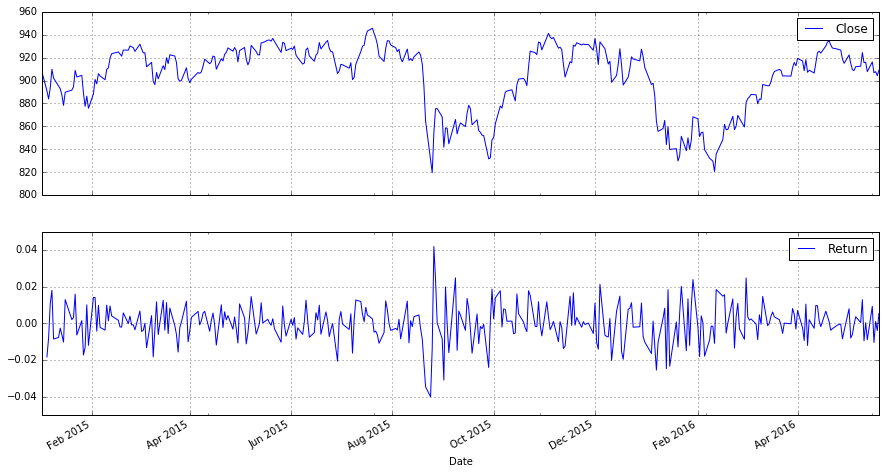

In [18]:
SP100[['Close','Return']].plot(subplots=True,style='b',grid=True, figsize=(15,8))

In [35]:
SP100['11d'] = pd.rolling_mean(SP100['Close'], window=11)
SP100['50d'] = pd.rolling_mean(SP100['Close'], window=50)
SP100['252d'] = pd.rolling_mean(SP100['Close'], window=252)

In [44]:
SP100.tail()

,Open,High,Low,Close,Volume,Return,11d,50d,252d,Mov_Vol_252d
Date,,,,,,,,,,
2016-05-16,907.530029,918.719971,907.530029,916.299988,3501360000,0.009309,914.574541,912.252596,900.305755,0.168633
2016-05-17,915.809998,915.809998,903.960022,906.820007,4108960000,-0.010400,913.162725,912.637396,900.193136,0.168932
2016-05-18,905.659973,913.169983,901.989990,907.760010,4101320000,0.001036,912.504544,913.197596,900.083572,0.168936
2016-05-19,906.599976,906.599976,898.080017,904.239990,3846770000,-0.003885,912.031816,913.604596,899.963771,0.168976
2016-05-20,904.570007,912.729980,904.570007,909.150024,3507650000,0.005415,912.063637,914.118197,899.854048,0.169046


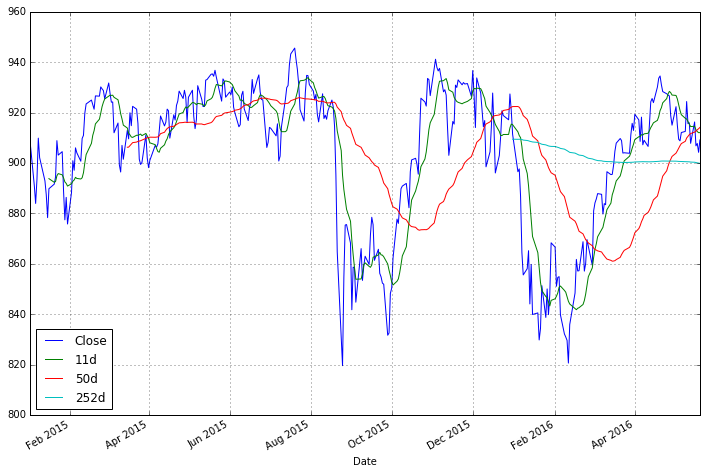

In [45]:
SP100[['Close', '11d', '50d', '252d']].plot(grid=True,figsize=(12,8))

In [46]:
import math
SP100['Mov_Vol_252d'] = pd.rolling_std(SP100['Return'], window=252) * math.sqrt(252) # moving anual volatility

In [ ]:
SP100